#DialogSum Analysis

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 require

In [ ]:
#importing the required libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#Loading the dialogsum dataset
dataset = load_dataset("knkarthick/dialogsum")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
#getting basic information of the dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})


In [ ]:
dataset_training = dataset['train']
#getting column names
print(dataset_training.column_names)

['id', 'dialogue', 'summary', 'topic']


In [ ]:
data_info= dataset_training.info
print(data_info)

DatasetInfo(description='', citation='', homepage='', license='', features={'id': Value(dtype='string', id=None), 'dialogue': Value(dtype='string', id=None), 'summary': Value(dtype='string', id=None), 'topic': Value(dtype='string', id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='csv', dataset_name='dialogsum', config_name='default', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=11439628, num_examples=12460, shard_lengths=None, dataset_name='dialogsum'), 'validation': SplitInfo(name='validation', num_bytes=446639, num_examples=500, shard_lengths=None, dataset_name='dialogsum'), 'test': SplitInfo(name='test', num_bytes=1367451, num_examples=1500, shard_lengths=None, dataset_name='dialogsum')}, download_checksums={'hf://datasets/knkarthick/dialogsum@a968e7aee0602e257935f1321a02e4287f7d5848/train.csv': {'num_bytes': 11321474, 'checksum': None}, 'hf://datasets/knkarthick/dialogsum@a968e7aee0602e257935f1321a02e4287f7d5848/validatio

In [ ]:
import pandas as pd

#converting dataset into dataframe
train_df = pd.DataFrame(dataset_training)
train_df.head()

,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance


In [ ]:
# Get information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12460 entries, 0 to 12459
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12460 non-null  object
 1   dialogue  12460 non-null  object
 2   summary   12460 non-null  object
 3   topic     12460 non-null  object
dtypes: object(4)
memory usage: 389.5+ KB


In [ ]:
# Get descriptive statistics of numerical columns
train_df.describe()

,id,dialogue,summary,topic
count,12460,12460,12460,12460
unique,12460,12458,12436,7434
top,train_0,#Person1#: I'm searching for an old music box....,#Person1# is surprised at Taylor whose hobbies...,shopping
freq,1,2,2,174


In [ ]:
# Finding non-unique values in the 'dialogue' column
non_unique_dialogue = train_df['dialogue'].value_counts()[train_df['dialogue'].value_counts() > 1]
print("Non-Unique Dialogues:")
non_unique_dialogue

Non-Unique Dialogues:


,count
dialogue,
"#Person1#: I'm searching for an old music box. \n#Person2#: You came to the right place. Any particular decade? \n#Person1#: If you had a box made in the '20s, that would be nice. \n#Person2#: We just got one in yesterday, so now we have six. \n#Person1#: Would any of them have dancing figures? \n#Person2#: Yes, we still have two boxes left that have dancing figures. \n#Person1#: Oh, they're both so beautiful. Let me have this one, I think. \n#Person2#: That one truly is a beautiful piece of work, isn't it? \n#Person1#: One last question \n#Person2#: Oh, no. Everything we sell here is 'as is. ' \n#Person1#: I guess I was asking for too much. \n#Person2#: If it breaks down, maybe you can find a repairman on the Internet.",2
"#Person1#: Any plans tonight? \n#Person2#: Not really, do you? \n#Person1#: Well, I am wondering if we took a hang-out for a drink or something. You know, I just came back from a really tough interview. I was quite nervous during the interview. I really want to have the job. Right now, I am still a little on the edge. I am not sure if I could convince them during the interview. \n#Person2#: Take it easy. It is all over now. How was it going, anyway? \n#Person1#: I don't know. I think I did well in the paper exams. I was prepared to answer a lot of questions, but they didn't ask those as I expected. To my surprise, the manager tried to talk about the Chinese poesy with me. \n#Person2#: That's strange. But probably, it is the new interview technique they call it 'Getting to know you more personally'. What about your answers? \n#Person1#: Just did my best.",2


In [ ]:
# Finding non-unique values in the 'summary' column
non_unique_summary = train_df['summary'].value_counts()[train_df['summary'].value_counts() > 1]
print("\nNon-Unique Summaries:")
non_unique_summary


Non-Unique Summaries:


,count
summary,
#Person1# is surprised at Taylor whose hobbies have changed a lot since high school.,2
#Person2# tells #Person1# where to find the cereal aisle and the dishwashing detergent.,2
#Person2# wants to rent a big house and #Person1# recommends one opposite the park for 325 a month. #Person2# decides to go and see it.,2
#Person1# gives #Person2# the menu and recommends their lunch special.,2
"#Person2# thinks #Person1# and #Person2# used to talk more before they were married, so #Person1# feels miserable and wants to go back to live with #Person2#'s parents.",2
#Person1#'s going shopping for groceries but doesn't know what to buy. #Person2# suggests getting the basics.,2
#Person1# asks #Person2# some questions about the bus pass and then gets a student bus pass with #Person2#'s help.,2
#Person1# lists several things to ask Tom for his promises.,2
#Person1# invites #Person2# to dinner. #Person2# agrees.,2


In [ ]:
non_unique_dialogues = train_df['dialogue'][train_df['dialogue'].duplicated(keep=False)]
# getting rows with these non-unique dialogues
non_unique_rows =train_df[train_df['dialogue'].isin(non_unique_dialogues)]
# getting the 'id' values of the rows having duplicate value in 'dialogue column.
non_unique_ids =non_unique_rows['id'].tolist()
print(non_unique_ids)

['train_1626', 'train_7618', 'train_9118', 'train_11492']


In [ ]:
non_unique_dialogues

,dialogue
1626,#Person1#: Any plans tonight? \n#Person2#: Not...
7618,#Person1#: I'm searching for an old music box....
9118,#Person1#: Any plans tonight? \n#Person2#: Not...
11492,#Person1#: I'm searching for an old music box....


In [ ]:
# Dropping duplicates in the 'dialogue' column
df_unique_dialogue =train_df.drop_duplicates(subset='dialogue', keep='first')
df_unique_dialogue

,id,dialogue,summary,topic,split_texts,word_counts,max_word_count,dialogue_word_count,summary_word_count
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up,"[#Person1#: Hi, Mr, Smith, I'm Doctor Hawkin...","[3, 1, 3, 18, 10, 6, 3, 30, 13, 2, 5, 6, 5, 4,...",30,30,14
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines,"[#Person1#: Hello Mrs, Parker, how have you b...","[3, 8, 1, 4, 8, 3, 17, 16, 27, 3, 10, 27, 11, 0]",27,27,10
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys,"[#Person1#: Excuse me, did you see a set of ke...","[23, 8, 14, 2, 3, 10, 6, 6, 4, 12, 3, 0]",23,23,15
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend,[#Person1#: Why didn't you tell me you had a g...,"[16, 12, 8, 7, 9, 8, 5, 19, 9, 0]",19,19,16
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance,"[#Person1#: Watsup, ladies! Y'll looking'fine ...","[6, 17, 0, 0, 4, 7, 3, 5, 6, 27, 2, 3]",27,27,11
...,...,...,...,...,...,...,...,...,...
12455,train_12455,#Person1#: Excuse me. You are Mr. Green from M...,Tan Ling picks Mr. Green up who is easily reco...,pick up someone,"[#Person1#: Excuse me, You are Mr, Green fro...","[3, 3, 12, 27, 4, 13, 12, 9, 11, 4, 6, 5, 13, ...",27,27,19
12456,train_12456,#Person1#: Mister Ewing said we should show up...,#Person1# and #Person2# plan to take the under...,conference center,[#Person1#: Mister Ewing said we should show u...,"[26, 22, 30, 11, 25, 0]",30,30,15
12457,train_12457,#Person1#: How can I help you today?\n#Person2...,#Person2# rents a small car for 5 days with th...,rent a car,[#Person1#: How can I help you today?\n#Person...,"[15, 7, 17, 20, 14, 11, 2, 15, 17, 0]",20,20,13
12458,train_12458,#Person1#: You look a bit unhappy today. What'...,#Person2#'s mom lost her job. #Person2# hopes ...,job losing,"[#Person1#: You look a bit unhappy today, Wha...","[7, 10, 6, 19, 18, 4, 8, 13, 10, 11, 4, 8, 18, 0]",19,19,11


In [ ]:
new_train_df = df_unique_dialogue

In [ ]:
!pip install datasets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!pip install datasets matplotlib wordcloud spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the Dialogsum dataset using huggingface
dataset = load_dataset('knkarthick/dialogsum')

# Printing the dataset
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})


In [ ]:
train_data= dataset['train']

In [ ]:
import numpy as np

# word counts for articles and summaries
train_article_lengths = [len(article.split()) for article in train_data['dialogue']]
train_summary_lengths = [len(summary.split()) for summary in train_data['summary']]

# basic statistics
print(f"Average article length: {np.mean(train_article_lengths):.2f} words")
print(f"Average summary length: {np.mean(train_summary_lengths):.2f} words")
print(f"Median article length: {np.median(train_article_lengths):.2f} words")
print(f"Median summary length: {np.median(train_summary_lengths):.2f} words")

Average article length: 130.99 words
Average summary length: 22.87 words
Median article length: 116.00 words
Median summary length: 21.00 words


Average word count per article: 130.987


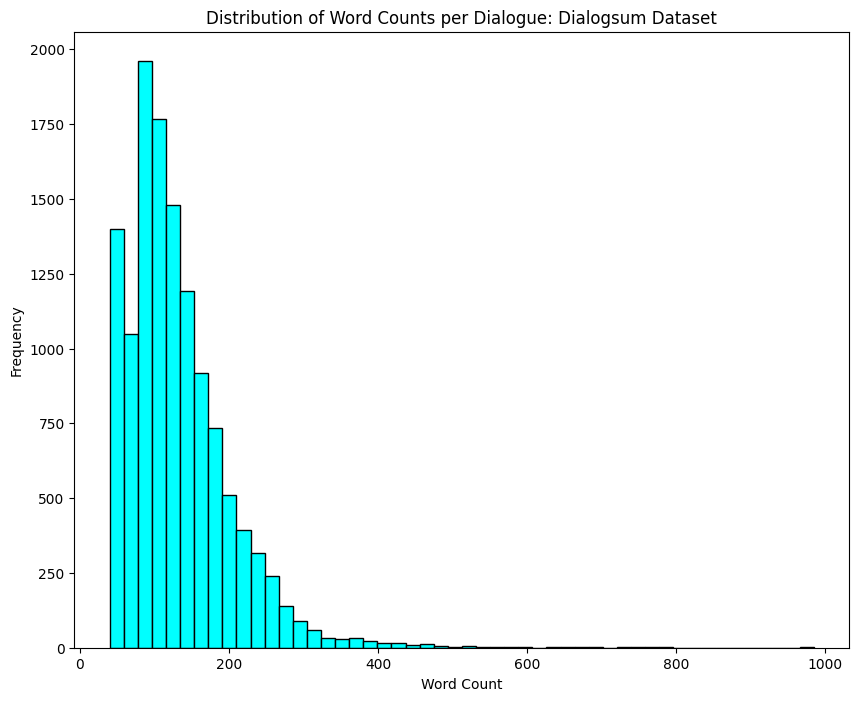

In [ ]:
# counting words in text
def word_count(text):
    return len(text.split())

# Extracting the word counts for the articles in the training set
trainind_data_counts=[word_count(article) for article in dataset['train']['dialogue']]

# Calculating the average word count
average_word_count=sum(trainind_data_counts) / len(trainind_data_counts)
print(f'Average word count per article: {average_word_count:.3f}')

# Plot of the distribution of word counts
plt.figure(figsize=(10, 8))
plt.hist(trainind_data_counts, bins=50, color='cyan', edgecolor='black')
plt.title('Distribution of Word Counts per Dialogue: Dialogsum Dataset')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Average word count per article: 22.868


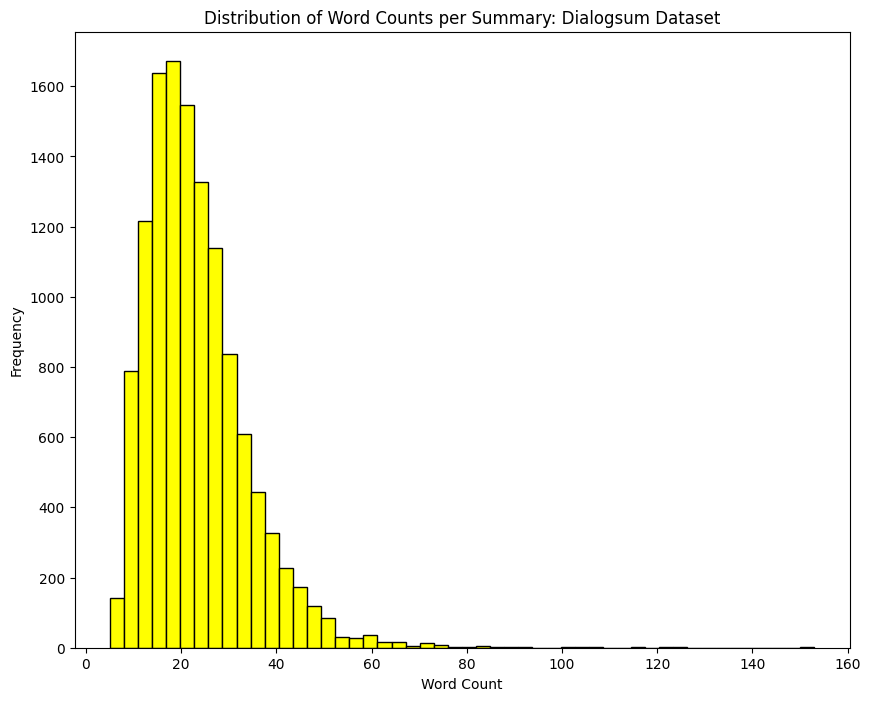

In [ ]:
# counting words in text
def word_count(text):
    return len(text.split())

# Extracting the word counts for the articles in the training set
trainind_data_counts = [word_count(article) for article in dataset['train']['summary']]

# Calculating the average word count
average_word_count =sum(trainind_data_counts) / len(trainind_data_counts)
print(f'Average word count per article: {average_word_count:.3f}')

# Plot of the distribution of word counts
plt.figure(figsize=(10, 8))
plt.hist(trainind_data_counts, bins=50, color='yellow', edgecolor='black')
plt.title('Distribution of Word Counts per Summary: Dialogsum Dataset')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from collections import Counter

Named Entity Types and Their Frequencies in Dialogsum Dataset:
Counter({'MONEY': 12, 'PERSON': 3, 'DATE': 3, 'CARDINAL': 2})


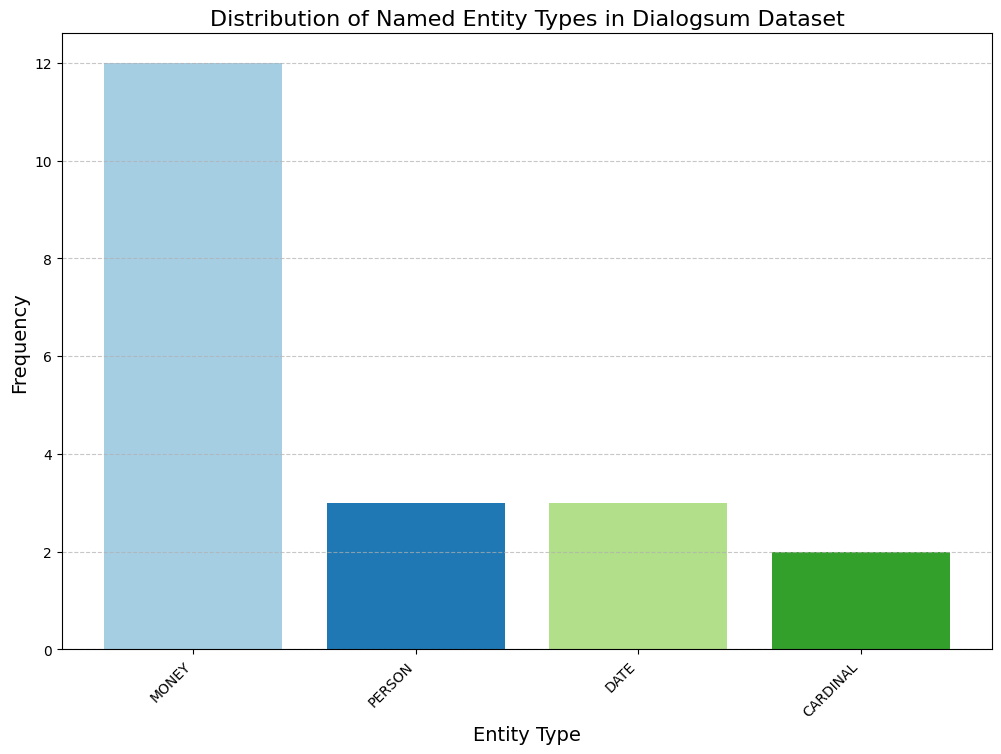

In [ ]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_sm')

# Performing NER on a sample article
sample_article = train_data['dialogue'][0]
doc = nlp(sample_article)

# Extracting and count entity types
entity_types = [ent.label_ for ent in doc.ents]
entity_freq = Counter(entity_types)

print(f"Named Entity Types and Their Frequencies in Dialogsum Dataset:\n{entity_freq}")

# Plotting the distribution of named entities
colors = plt.cm.Paired(range(len(entity_freq)))

plt.figure(figsize=(12, 8))
plt.bar(entity_freq.keys(), entity_freq.values(), color=colors)
plt.title('Distribution of Named Entity Types in Dialogsum Dataset', fontsize=16)
plt.xlabel('Entity Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
df = pd.DataFrame(train_data)
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance


In [ ]:
# basic statistics
print("\nBasic statistics:")
df.describe()


Basic statistics:


,id,dialogue,summary,topic
count,12460,12460,12460,12460
unique,12460,12458,12436,7434
top,train_0,#Person1#: I'm searching for an old music box....,#Person1# is surprised at Taylor whose hobbies...,shopping
freq,1,2,2,174
